<a href="https://colab.research.google.com/github/Aleksandrovna15/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module F - Alisa Fedorova**

20.1 Numerical Differentiation Problem Statement
*   Numerical grid - an evenly spaced set of points over the domain of a function over some interval.
*   Spacing (step size) - the distance between adjacent points on the grid.
*   In Python, it is important to discretize the data since we can really only work with discrete points.

20.2 Finite Difference Approximating Derivatives
*   In finite difference approximations of the slope, we can use values of the limit function (lim x-> a of f(x)-f(a)/ x-a) in the neighborhood of the point x = a to find the slope of that point.
*   Forward Difference - estimate the slope of the function at xj using the line that connects (xj, f(xj)) and (xj+1, f(xj+1))
*   Backward Difference - estimate the slope of the function at xj using the *
  line that connects (xj-1, f(xj-1)) and (xj, f(xj))
*   Central Difference - estimate the slope of the function at xj using the line that connects (xj-1, f(xj-1)) and (xj+1, f(xj+1))
*   If we want to use the Taylor series to solve, we need to calculate the forward difference and not forget to match the big-O functions during calculations.

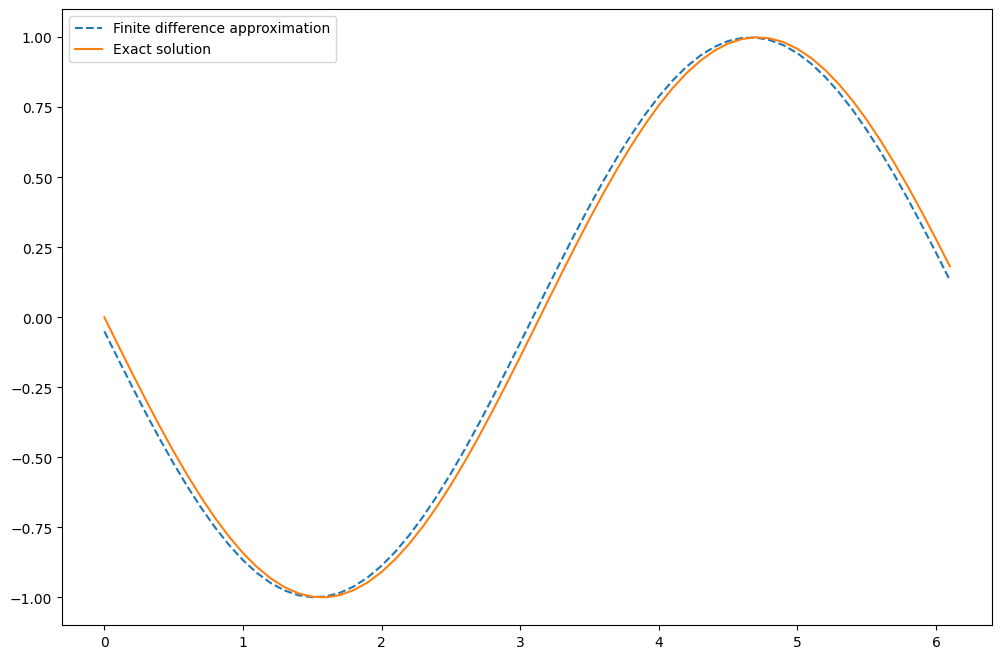

0.049984407218554114


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

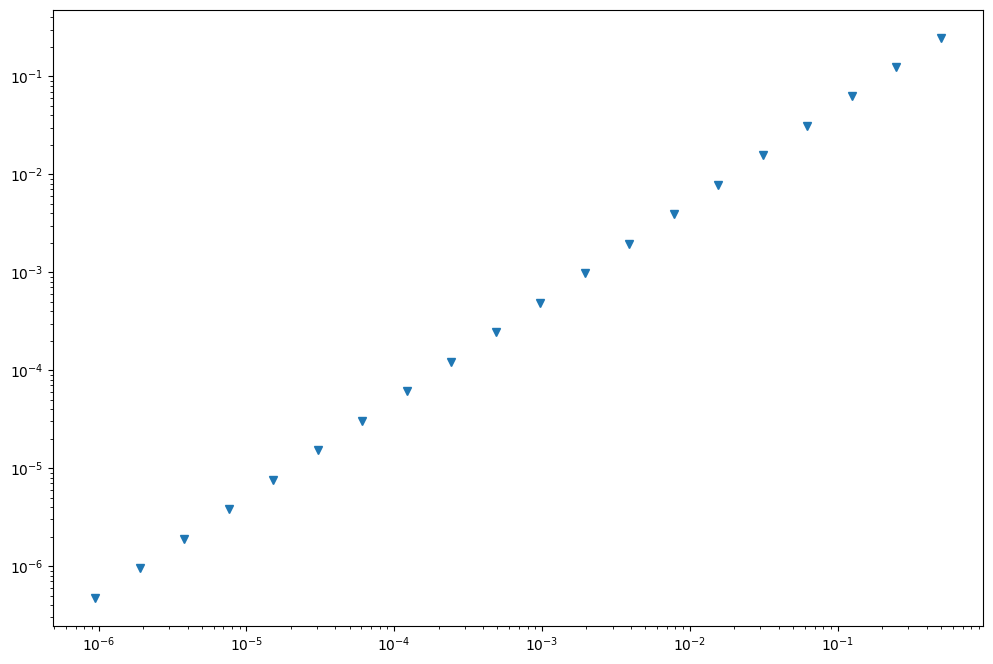

In [2]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

Since the graph above has a log-log slope of 1, the forward difference function is indeed O(h) where the h^1 is proportional to the error.

20.3 Approximating of Higher Order Derivatives
*   Using the Taylor Series we can also approximate higher order derivatives like f''(x) and f'''(x).
*   $f''(xj)≈(f(x_(j+1))-2f(x_j)+f(x_(j-1)))/h2,andis O(h^2)$.

20.4 Numerical Differentiation with Noise
*   Sometimes data can be contaminated with noise, meaning its value is off by a small amount from what it would be if it were computed from a pure mathematical function
*   This can often occur in engineering due to inaccuracies in measurement devices or the data itself can be slightly modified by perturbations outside the system of interest

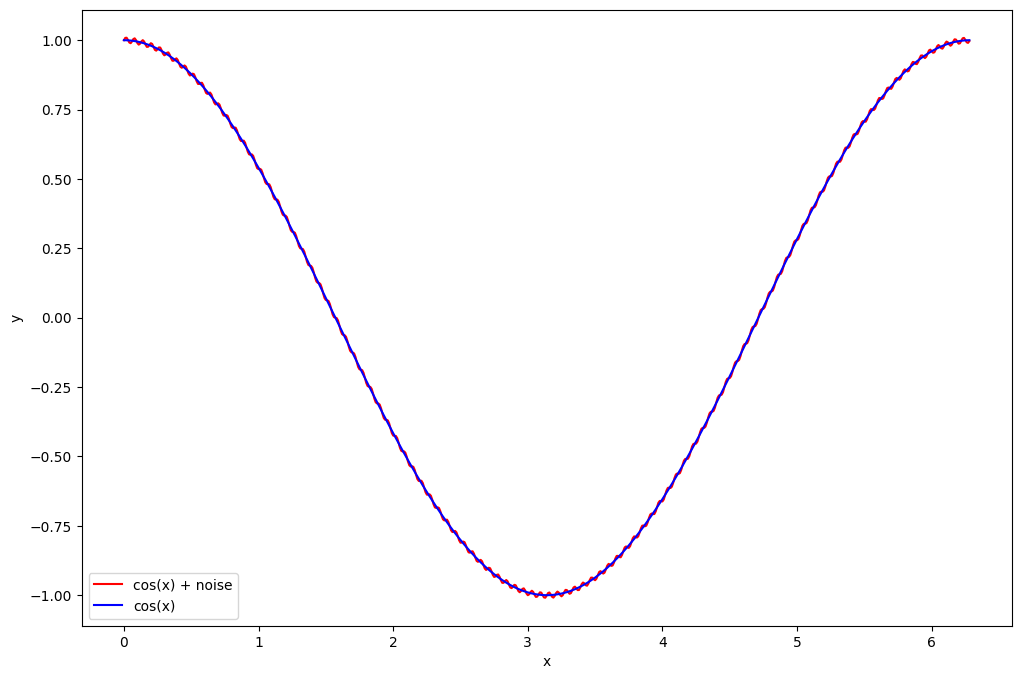

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

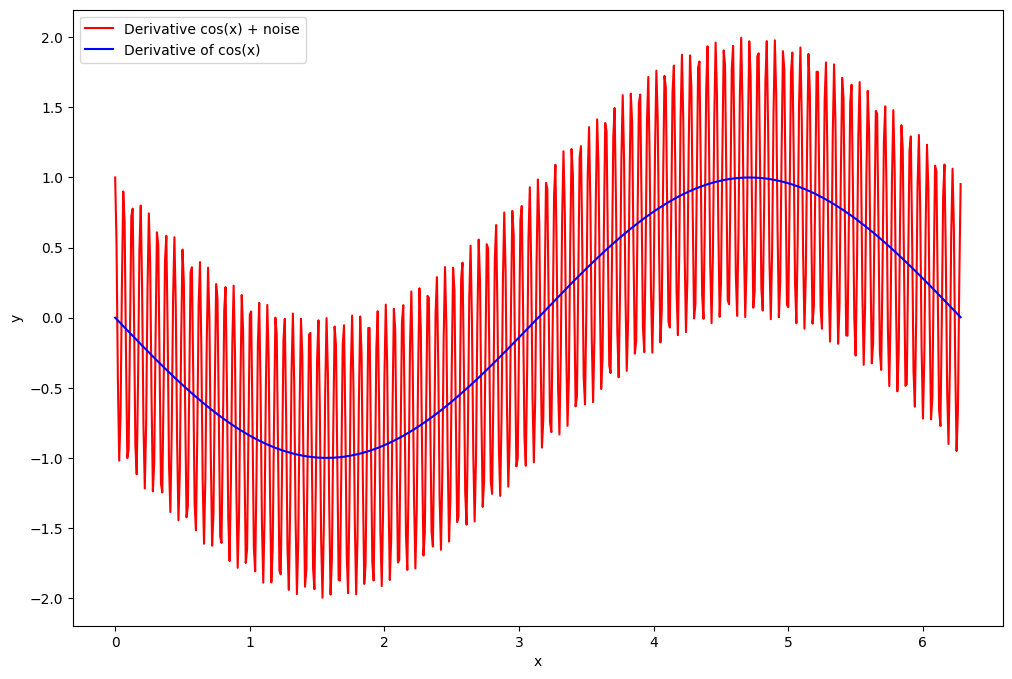

In [4]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The more we wee that the red line is furthur away from the actual function, the less usable the data gets.